### IMPORTING REQUIRED LIBRARIES

In [9]:
import numpy as np
import pandas as pd
from scipy import stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

### READING THE DATA

In [296]:
df=pd.read_csv("D:\\DATA SCIENCE\\Kaggle Projects\\New folder (2)\\audit_risk.csv")

In [3]:
df.sample(n=7)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
543,59.85,5,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,...,0.4,0,0.2,0.0,2.0,1.688,0.4,0.5,0.3376,0
67,3.89,12,13.92,0.6,8.352,2.20,0.2,0.440,16.12,5.0,...,0.4,0,0.2,0.0,2.4,10.202,0.4,0.5,2.0404,1
744,55.57,13,0.10,0.2,0.020,0.00,0.2,0.000,0.10,5.0,...,0.4,0,0.2,0.0,2.0,1.420,0.4,0.5,0.2840,0
629,55.57,37,0.49,0.2,0.098,4.78,0.6,2.868,5.27,5.0,...,0.4,0,0.2,0.0,3.2,4.366,0.4,0.5,0.8732,0
206,2.72,13,3.84,0.6,2.304,144.39,0.6,86.634,148.23,5.0,...,0.8,1,0.4,0.4,4.4,102.946,1.2,0.5,61.7676,1
399,1.85,8,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,...,0.8,0,0.2,0.0,2.6,8.118,0.8,0.5,3.2472,1
347,1.99,25,0.53,0.2,0.106,0.00,0.2,0.000,0.53,5.0,...,0.4,0,0.2,0.0,2.0,1.972,0.4,0.5,0.3944,0


### DIMENSIONS OF THE DATA

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

(776, 27)

#### There are 776 data points and 27 columns. All the columns are continuous in nature

### MISSING VALUES

In [5]:
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

#### There is only one missing value in the dataset present in Money value column

### STATISTICAL DESCRIPTION

In [7]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


### REPLACING MISSING VALUES

#### HISTOGRAM

<function matplotlib.pyplot.show(close=None, block=None)>

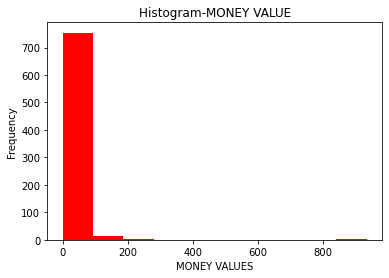

In [11]:
##Histogram
plt.hist(df.Money_Value,color='red')
plt.xlabel('MONEY VALUES')
plt.ylabel('Frequency')
plt.title('Histogram-MONEY VALUE')
plt.show

In [297]:
df_null=df["Money_Value"][(df['Risk']==0)]

In [298]:
df_null

1      0.94
2      0.00
4      0.00
5      2.95
9      1.93
       ... 
771    0.00
772    0.00
773    0.00
774    0.00
775    0.32
Name: Money_Value, Length: 471, dtype: float64

In [299]:
df_notnull=df_null.dropna()

<function matplotlib.pyplot.show(close=None, block=None)>

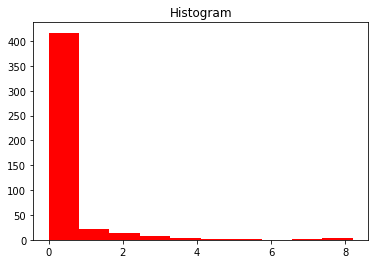

In [18]:
##Histogram
plt.hist(df_notnull,color='red')
plt.title('Histogram')
plt.show

In [300]:
df_notnull.median()

0.0

In [301]:
df.Money_Value=df.Money_Value.fillna(df_notnull.median())

In [28]:
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

# EDA

#### ANALYZING TARGET VARIABLE

### RISK

In [29]:
df.Risk.value_counts()

0    471
1    305
Name: Risk, dtype: int64

#### Though Risk is in int data type let us consider it as object and analyze it

### COUNT PLOT

Text(0.5, 1.0, 'Risk counting')

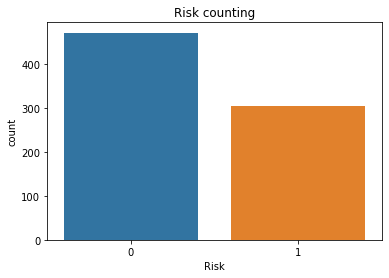

In [30]:
sns.countplot(x='Risk',data=df)
plt.xlabel=("Risk")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Risk counting")

#### There are more counts of not having Risk.Let us see the distibution of the same using pieplot

### PIE CHART

In [ ]:
Frequency_by_risk=df["Risk"].value_counts()
keys=Frequency_by_risk.keys().to_list()
counts=Frequency_by_risk.to_list()

plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.2,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Risk Distribution")
plt.show()
        

In [33]:
df.Risk.describe()

count    776.000000
mean       0.393041
std        0.488741
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Risk, dtype: float64

### 1.Sector Score

In [36]:
df.Sector_score.value_counts()

55.57    200
3.89     114
1.85      95
2.72      82
3.41      76
2.37      74
1.99      47
21.61     41
59.85     37
2.34       5
15.56      3
2.36       1
17.68      1
Name: Sector_score, dtype: int64

In [52]:
df.Sector_score.describe()

count    776.000000
mean      20.184536
std       24.319017
min        1.850000
25%        2.370000
50%        3.890000
75%       55.570000
max       59.850000
Name: Sector_score, dtype: float64

#### HISTOGRAM

<function matplotlib.pyplot.show(close=None, block=None)>

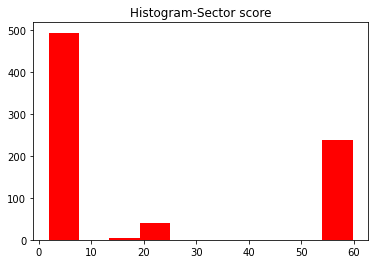

In [37]:
##Histogram
plt.hist(df.Sector_score,color='red')
plt.xlabel=('Sector score')
plt.ylabel=('Frequency')
plt.title('Histogram-Sector score')
plt.show

### COUNT PLOT

Text(0.5, 1.0, 'Sector_score counting')

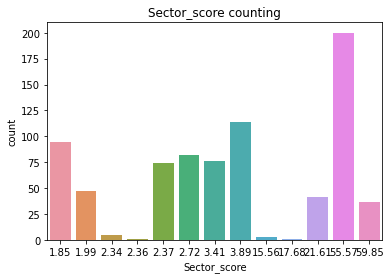

In [38]:
sns.countplot(x='Sector_score',data=df)
plt.xlabel=("Sector_score")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Sector_score counting")

Text(0.5, 1.0, 'Sector score with Risk')

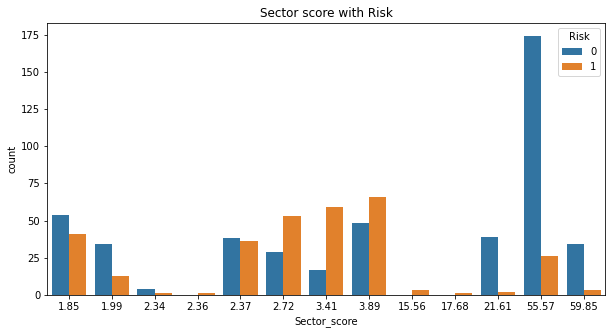

In [50]:
sns.countplot(x='Sector_score',hue="Risk",data=df)
plt.xlabel=("Sector score")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [10,8]
plt.title("Sector score with Risk")

##### With sector score 55.57 there is no possibitly of risk,So we can understand that higher the sector score lower the risk.

#### Sector score has different float values with score of 55.57 as highest.Let us analyze the ditribution of each score in the data set using pieplot

### PIE CHART

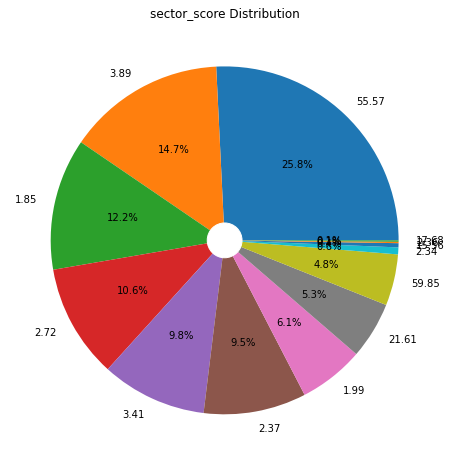

In [45]:
Frequency_by_sector_score=df["Sector_score"].value_counts()
keys=Frequency_by_sector_score.keys().to_list()
counts=Frequency_by_sector_score.to_list()
plt.rcParams['figure.figsize'] = [10,8]
plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.1,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("sector_score Distribution")
plt.show()
        

#### 55.7 score has 25.8% of distribution in the data followed by 3.89 score has 14.7% of distribution

In [65]:
df.groupby("Risk")["Sector_score"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,27.892611,25.788593,1.85,2.37,21.61,55.57,59.85
1,305.0,8.281246,15.662242,1.85,2.37,3.41,3.89,59.85


### 2.Location ID

In [46]:
df.LOCATION_ID.value_counts()

8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
13         35
15         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
21          8
28          8
27          8
43          7
25          6
20          5
36          4
30          4
38          4
7           4
3           3
40          3
35          2
SAFIDON     1
44          1
24          1
41          1
42          1
17          1
33          1
34          1
LOHARU      1
23          1
NUH         1
Name: LOCATION_ID, dtype: int64

### 3.PARA_A

In [58]:
df.PARA_A.describe()

count    776.000000
mean       2.450194
std        5.678870
min        0.000000
25%        0.210000
50%        0.875000
75%        2.480000
max       85.000000
Name: PARA_A, dtype: float64

### HISTOGRAM

<function matplotlib.pyplot.show(close=None, block=None)>

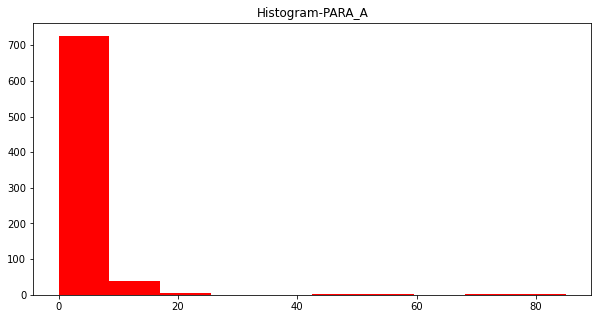

In [57]:
##Histogram
plt.hist(df.PARA_A,color='red')
plt.xlabel=('PARA_A')
plt.ylabel=('Frequency')
plt.rcParams['figure.figsize'] = [5,5]
plt.title('Histogram-PARA_A')
plt.show

### BOX PLOT

<AxesSubplot:>

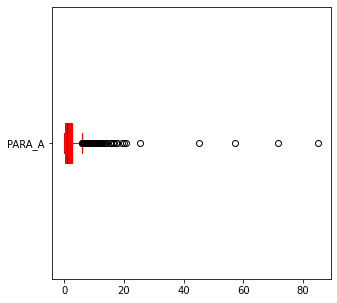

In [59]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df.PARA_A.plot.box(color=props2, patch_artist = True, vert = False)

In [61]:
IQR=df.PARA_A.quantile(0.75)-df.PARA_A.quantile(0.25)
LL=df.PARA_A.quantile(0.25)-(1.5*IQR)
UL=df.PARA_A.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  2.27
LL:  -3.1950000000000003
UL:  5.885


In [63]:
UL_LEN=len(df.PARA_A[df.PARA_A>UL])
print('UPPER LIMILT LENGHT :',UL_LEN)

UPPER LIMILT LENGHT : 82


In [64]:
UL_PERC=UL_LEN/len(df)
print('UPPER LIMILT  OUTLIERS PERCENTAGE  :',UL_PERC)

UPPER LIMILT  OUTLIERS PERCENTAGE  : 0.1056701030927835


#### Since there are 10 perecentage of outliers in the data it dosent matter much

In [66]:
df.groupby("Risk")["PARA_A"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,0.720446,0.894807,0.0,0.00,0.49,1.00,5.2
1,305.0,5.121379,8.317627,0.0,1.19,3.08,6.47,85.0


### 4.Score_A

In [67]:
df.Score_A.describe()

count    776.000000
mean       0.351289
std        0.174055
min        0.200000
25%        0.200000
50%        0.200000
75%        0.600000
max        0.600000
Name: Score_A, dtype: float64

In [69]:
df.Score_A.value_counts()

0.2    411
0.6    222
0.4    143
Name: Score_A, dtype: int64

### HISTOGRAM

<function matplotlib.pyplot.show(close=None, block=None)>

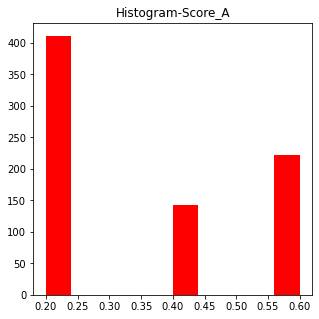

In [68]:
##Histogram
plt.hist(df.Score_A,color='red')
plt.xlabel=('Score_A')
plt.ylabel=('Frequency')
plt.rcParams['figure.figsize'] = [5,5]
plt.title('Histogram-Score_A')
plt.show

### COUNT PLOT

Text(0.5, 1.0, 'Score_A counting')

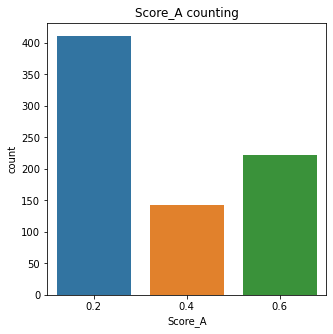

In [70]:
sns.countplot(x='Score_A',data=df)
plt.xlabel=("Score-A")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Score_A counting")

#### More datapoints with 0.2 as Score A. Let us analyze the distribution with pieplot

### PIE CHART

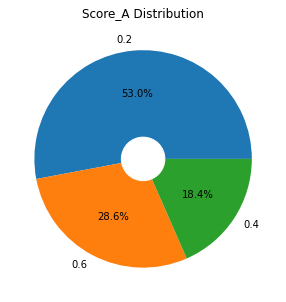

In [71]:
Frequency_by_score=df["Score_A"].value_counts()
keys=Frequency_by_score.keys().to_list()
counts=Frequency_by_score.to_list()

plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.2,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Score_A Distribution")
plt.show()
        

#### More than half of the data in score A is for 0.2.Let us see the influence of Score A with Target variable

### COUNT PLOT WITH RISK AS HUE

Text(0.5, 1.0, 'Score A with Risk')

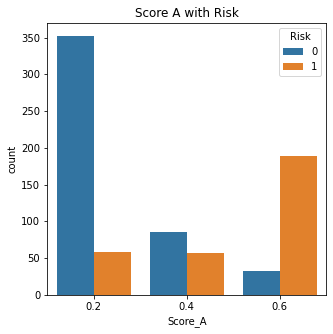

In [72]:
sns.countplot(x='Score_A',hue="Risk",data=df)
plt.xlabel=("Score A")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [10,8]
plt.title("Score A with Risk")

#### With Score as 0.2 the there is less possibility of facing Risk. With 0.6 as score there is high possibility of facing risk. But with 0.4 as score there is almst equal probabiltiy of facing the risk though not having risk portion is higher.

In [73]:
df.groupby("Risk")["Score_A"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,0.264544,0.119910,0.2,0.2,0.2,0.4,0.6
1,305.0,0.485246,0.159188,0.2,0.4,0.6,0.6,0.6


### 5.RISK A

In [112]:
df.Risk_A.describe()

count    653.000000
mean       0.813045
std        2.478534
min        0.000000
25%        0.010000
50%        0.136000
75%        0.612000
max       51.000000
Name: Risk_A, dtype: float64

### HISTOGRAM

<function matplotlib.pyplot.show(close=None, block=None)>

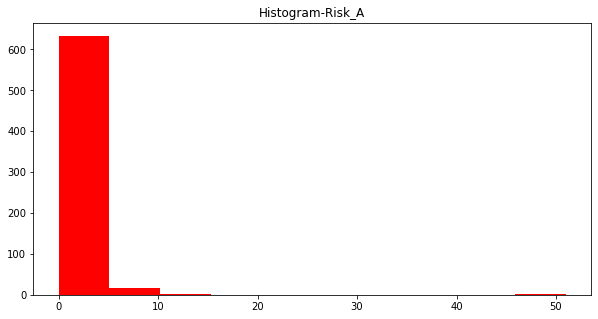

In [113]:
##Histogram
plt.hist(df.Risk_A,color='red')
plt.xlabel=('Risk_A')
plt.ylabel=('Frequency')
plt.rcParams['figure.figsize'] = [5,5]
plt.title('Histogram-Risk_A')
plt.show

### BOX PLOT

<AxesSubplot:>

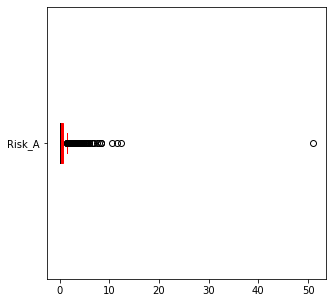

In [114]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df.Risk_A.plot.box(color=props2, patch_artist = True, vert = False)

In [120]:
IQR=df.Risk_A.quantile(0.75)-df.Risk_A.quantile(0.25)
LL=df.Risk_A.quantile(0.25)-(1.5*IQR)
UL=df.Risk_A.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  0.602
LL:  -0.893
UL:  1.5150000000000001


In [121]:
UL_LEN=len(df.Risk_A[df.Risk_A>UL])
print('UPPER LIMILT LENGHT :',UL_LEN)

UPPER LIMILT LENGHT : 97


In [122]:
UL_PERC=UL_LEN/len(df)
print('UPPER LIMILT  OUTLIERS PERCENTAGE  :',UL_PERC)

UPPER LIMILT  OUTLIERS PERCENTAGE  : 0.14854517611026033


In [123]:
df.groupby("Risk")["Risk_A"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,0.285635,0.524677,0.0,0.00,0.098,0.400,3.12
1,182.0,2.177935,4.337852,0.0,0.18,1.013,2.535,51.00


### SCATTER PLOT

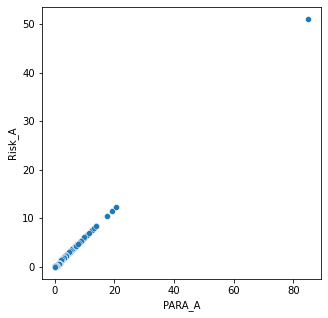

In [125]:
sns.scatterplot(x='PARA_A',y='Risk_A',data=df)
plt.show()

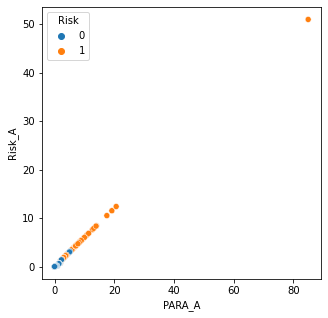

In [127]:
sns.scatterplot(x='PARA_A',y='Risk_A',hue='Risk',data=df)
plt.show()

### 6.PARA_B

In [77]:
df.PARA_B.describe()

count     776.000000
mean       10.799988
std        50.083624
min         0.000000
25%         0.000000
50%         0.405000
75%         4.160000
max      1264.630000
Name: PARA_B, dtype: float64

### HISTOGRAM

<function matplotlib.pyplot.show(close=None, block=None)>

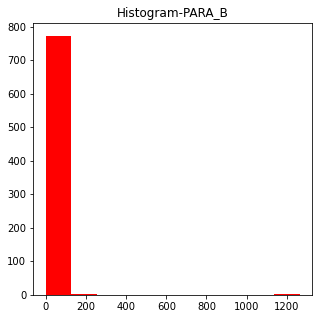

In [79]:
##Histogram
plt.hist(df.PARA_B,color='red')
plt.xlabel=('PARA_B')
plt.ylabel=('Frequency')
plt.rcParams['figure.figsize'] = [10,5]
plt.title('Histogram-PARA_B')
plt.show

### BOX PLOT

<AxesSubplot:>

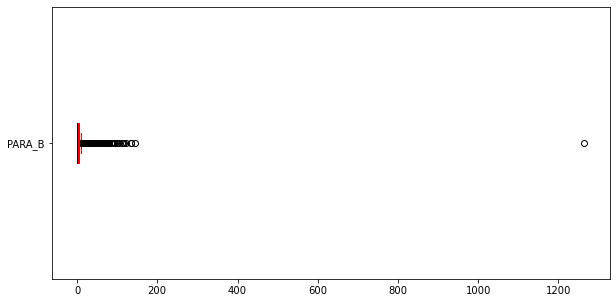

In [80]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df.PARA_B.plot.box(color=props2, patch_artist = True, vert = False)

In [302]:
IQR=df.PARA_B.quantile(0.75)-df.PARA_B.quantile(0.25)
LL=df.PARA_B.quantile(0.25)-(1.5*IQR)
UL=df.PARA_B.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  4.16
LL:  -6.24
UL:  10.4


In [303]:
UL_LEN=len(df.PARA_B[df.PARA_B>UL])
print('UPPER LIMILT LENGHT :',UL_LEN)

UPPER LIMILT LENGHT : 138


In [304]:
UL_PERC=UL_LEN/len(df)
print('UPPER LIMILT  OUTLIERS PERCENTAGE  :',UL_PERC)

UPPER LIMILT  OUTLIERS PERCENTAGE  : 0.17783505154639176


In [305]:
df=df[df["PARA_B"]<15]

In [97]:
IQR=df.PARA_B.quantile(0.75)-df.PARA_B.quantile(0.25)
LL=df.PARA_B.quantile(0.25)-(1.5*IQR)
UL=df.PARA_B.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  1.0
LL:  -1.5
UL:  2.5


In [98]:
UL_LEN=len(df.PARA_B[df.PARA_B>UL])
print('UPPER LIMILT LENGHT :',UL_LEN)

UPPER LIMILT LENGHT : 89


In [102]:
UL_PERC=UL_LEN/len(df)
print('UPPER LIMILT  OUTLIERS PERCENTAGE  :',UL_PERC)

UPPER LIMILT  OUTLIERS PERCENTAGE  : 0.1362940275650842


In [104]:
df.groupby("Risk")["PARA_B"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,0.447667,0.912499,0.0,0.000,0.0015,0.5850,7.37
1,182.0,3.205220,3.865849,0.0,0.005,1.3500,5.5425,14.64


### SCATTER PLOT

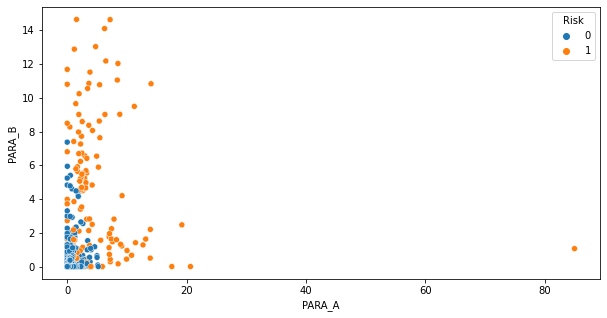

In [107]:
sns.scatterplot(x='PARA_A',y='PARA_B',hue='Risk',data=df)
plt.show()

### 7.Score_B

In [108]:
df.Score_B.value_counts()

0.2    521
0.4     71
0.6     61
Name: Score_B, dtype: int64

In [128]:
df.Score_B.describe()

count    653.000000
mean       0.259112
std        0.125800
min        0.200000
25%        0.200000
50%        0.200000
75%        0.200000
max        0.600000
Name: Score_B, dtype: float64

### COUNT PLOT

Text(0.5, 1.0, 'Score_B counting')

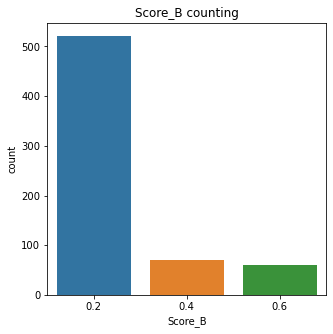

In [129]:
sns.countplot(x='Score_B',data=df)
plt.xlabel=("Score-B")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Score_B counting")

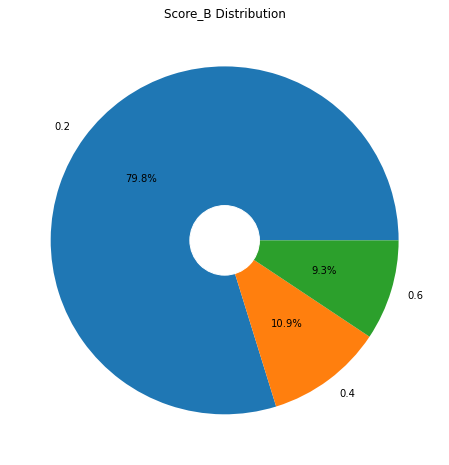

In [132]:
Frequency_by_score=df["Score_B"].value_counts()
keys=Frequency_by_score.keys().to_list()
counts=Frequency_by_score.to_list()

plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.2,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Score_B Distribution")
plt.show()
        

#### 80% of the data belongs of score B is for 0.2 .Let us see the influence of Score A with Target variable

#### COUNT PLOT WITH RISK AS HUE

Text(0.5, 1.0, 'Score B with Risk')

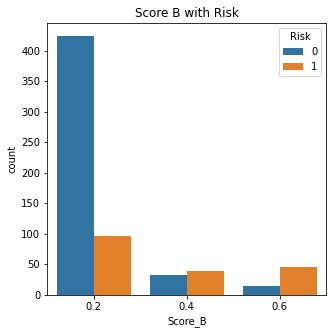

In [131]:
sns.countplot(x='Score_B',hue="Risk",data=df)
plt.xlabel=("Score B")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [10,8]
plt.title("Score B with Risk")

#### With Score as 0.2 the there is less possibility of facing Risk. With 0.6 as score there is high possibility of facing risk. But with 0.4 as score there is almst equal probabiltiy of facing the risk though not having risk portion is higher.

In [133]:
df.groupby("Risk")["Score_B"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,471.0,0.226327,0.084470,0.2,0.2,0.2,0.20,0.6
1,182.0,0.343956,0.168653,0.2,0.2,0.2,0.55,0.6


### 8.Risk_B

In [134]:
df.Risk_B.describe()

count    653.000000
mean       0.556258
std        1.370404
min        0.000000
25%        0.000000
50%        0.022000
75%        0.206000
max        8.778000
Name: Risk_B, dtype: float64

### HISTOGRAM

<function matplotlib.pyplot.show(close=None, block=None)>

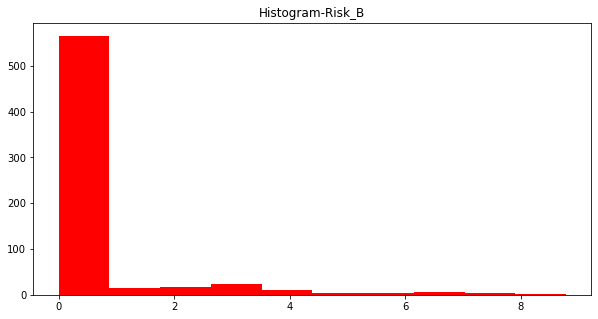

In [136]:
##Histogram
plt.hist(df.Risk_B,color='red')
plt.xlabel=('Risk_B')
plt.ylabel=('Frequency')
plt.rcParams['figure.figsize'] = [5,5]
plt.title('Histogram-Risk_B')
plt.show

### BOX PLOT

<AxesSubplot:>

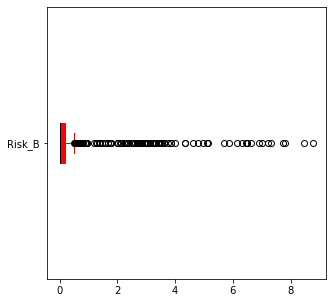

In [138]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df.Risk_B.plot.box(color=props2, patch_artist = True, vert = False)

In [307]:
IQR=df.Risk_B.quantile(0.75)-df.PARA_B.quantile(0.25)
LL=df.PARA_B.quantile(0.25)-(1.5*IQR)
UL=df.PARA_B.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  0.20600000000000002
LL:  -0.30900000000000005
UL:  1.3090000000000002


In [308]:
UL_LEN=len(df.Risk_A[df.Risk_A>UL])
print('UPPER LIMILT LENGHT :',UL_LEN)

UPPER LIMILT LENGHT : 118


In [309]:
UL_PERC=UL_LEN/len(df)
print('UPPER LIMILT  OUTLIERS PERCENTAGE  :',UL_PERC)

UPPER LIMILT  OUTLIERS PERCENTAGE  : 0.1807044410413476


In [310]:
df=df[df["PARA_B"]<2]

In [143]:
IQR=df.Risk_B.quantile(0.75)-df.PARA_B.quantile(0.25)
LL=df.PARA_B.quantile(0.25)-(1.5*IQR)
UL=df.PARA_B.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  0.10800000000000001
LL:  -0.16200000000000003
UL:  0.7020000000000001


In [144]:
UL_LEN=len(df.Risk_A[df.Risk_A>UL])
print('UPPER LIMILT LENGHT :',UL_LEN)

UPPER LIMILT LENGHT : 73


In [145]:
UL_PERC=UL_LEN/len(df)
print('UPPER LIMILT  OUTLIERS PERCENTAGE  :',UL_PERC)

UPPER LIMILT  OUTLIERS PERCENTAGE  : 0.1322463768115942


### SCATTER PLOT

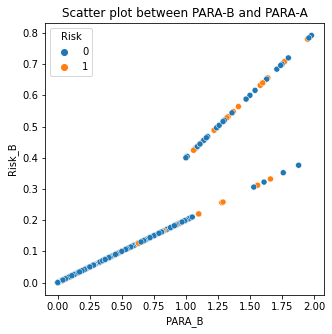

In [148]:
sns.scatterplot(x='PARA_B',y='Risk_B',hue='Risk',data=df)
plt.title('Scatter plot between PARA-B and PARA-A')
plt.show()

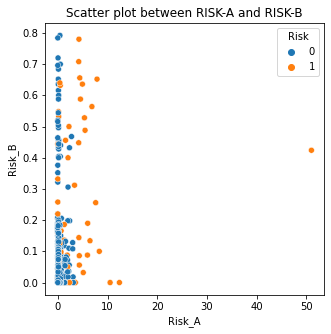

In [149]:
sns.scatterplot(x='Risk_A',y='Risk_B',hue='Risk',data=df)
plt.title('Scatter plot between RISK-A and RISK-B')
plt.show()

In [151]:
df.groupby('Risk')["Risk_B"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,449.0,0.074410,0.143322,0.0,0.0,0.000,0.094,0.792
1,103.0,0.140951,0.216483,0.0,0.0,0.016,0.176,0.780


### 9.TOTAL

In [153]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,...,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.0,552.000000,552.000000
mean,24.219873,1.303316,0.287319,0.641808,0.312864,0.217754,0.086826,1.571615,5.019928,0.207246,...,0.515942,0.023551,0.203261,0.012319,2.242029,5.371422,0.528261,0.5,2.277115,0.186594
std,25.473283,4.169603,0.140979,2.518573,0.472087,0.056933,0.161401,4.201012,0.133233,0.046100,...,0.293980,0.258060,0.030546,0.149021,0.375823,23.031670,0.364782,0.0,13.206270,0.389939
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.340000,0.017500,0.200000,0.003500,0.000000,0.200000,0.000000,0.248775,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.507500,0.400000,0.5,0.301500,0.000000
50%,3.890000,0.575000,0.200000,0.115000,0.000000,0.200000,0.000000,0.895000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.826000,0.400000,0.5,0.367600,0.000000
75%,55.570000,1.162500,0.400000,0.465000,0.540000,0.200000,0.108000,1.600000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.398500,0.400000,0.5,0.753000,0.000000
max,59.850000,85.000000,0.600000,51.000000,1.980000,0.400000,0.792000,86.060000,6.500000,0.600000,...,2.400000,4.000000,0.600000,2.400000,4.600000,412.624000,4.800000,0.5,204.780800,1.000000


### HISTOGRAM

<function matplotlib.pyplot.show(close=None, block=None)>

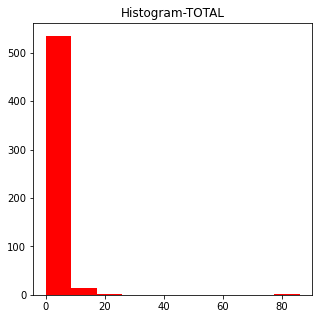

In [160]:
#Histogram
plt.hist(df.TOTAL,color='red')
plt.xlabel=('TOTAL')
plt.ylabel=('Frequency')
plt.rcParams['figure.figsize'] = [5,5]
plt.title('Histogram-TOTAL')
plt.show

### BOXPLOT

<AxesSubplot:>

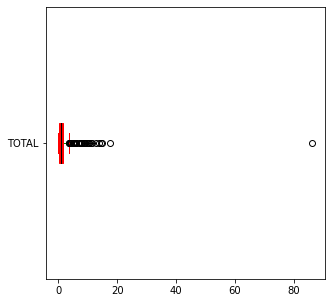

In [155]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df.TOTAL.plot.box(color=props2, patch_artist = True, vert = False)

In [156]:
IQR=df.TOTAL.quantile(0.75)-df.TOTAL.quantile(0.25)
LL=df.TOTAL.quantile(0.25)-(1.5*IQR)
UL=df.TOTAL.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  1.3512250000000001
LL:  -1.7780625
UL:  3.6268375


In [157]:
UL_LEN=len(df.TOTAL[df.TOTAL>UL])
print('UPPER LIMILT LENGHT :',UL_LEN)

UPPER LIMILT LENGHT : 42


In [158]:
UL_PERC=UL_LEN/len(df)
print('UPPER LIMILT  OUTLIERS PERCENTAGE  :',UL_PERC)

UPPER LIMILT  OUTLIERS PERCENTAGE  : 0.07608695652173914


In [164]:
df.groupby("Risk")['TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,449.0,0.996684,1.026877,0.0,0.21,0.84,1.370,5.77
1,103.0,4.077870,9.105336,0.0,0.69,1.35,4.235,86.06


### 10.Numbers

### HISTOGRAM

<function matplotlib.pyplot.show(close=None, block=None)>

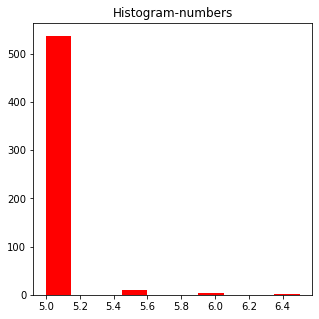

In [161]:
#Histogram
plt.hist(df.numbers,color='red')
plt.xlabel=('numbers')
plt.ylabel=('Frequency')
plt.rcParams['figure.figsize'] = [5,5]
plt.title('Histogram-numbers')
plt.show

In [162]:
df.numbers.describe()

count    552.000000
mean       5.019928
std        0.133233
min        5.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        6.500000
Name: numbers, dtype: float64

In [163]:
df.numbers.value_counts()

5.0    537
5.5     10
6.0      3
6.5      2
Name: numbers, dtype: int64

### COUNT PLOT

Text(0.5, 1.0, 'numbers counting')

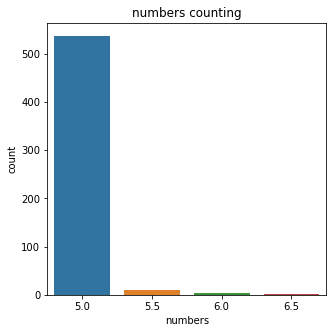

In [165]:
sns.countplot(x='numbers',data=df)
plt.xlabel=("numbers")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("numbers counting")

### PIE CHART

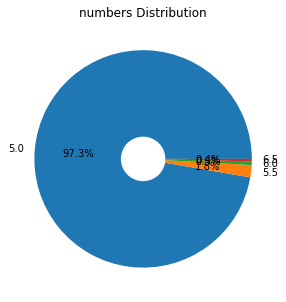

In [166]:
Frequency_by_numbers=df["numbers"].value_counts()
keys=Frequency_by_numbers.keys().to_list()
counts=Frequency_by_numbers.to_list()

plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.2,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("numbers Distribution")
plt.show()
        

##### 97.3% of data belongs to 5

#### COUNT PLOT WITH RISK AS HUE

Text(0.5, 1.0, 'numbers with Risk')

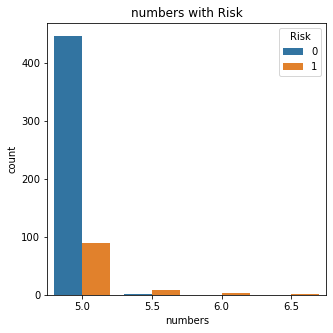

In [167]:
sns.countplot(x='numbers',hue="Risk",data=df)
plt.xlabel=("numbers")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [10,8]
plt.title("numbers with Risk")

#### with 5.0 risk is less with remaining numbers Risk probability is more

In [169]:
df.groupby("Risk")['numbers'].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,449.0,5.002227,0.033333,5.0,5.0,5.0,5.0,5.5
1,103.0,5.097087,0.289169,5.0,5.0,5.0,5.0,6.5


### 11.Score_B.1

In [173]:
df["Score_B.1"].value_counts()

0.2    537
0.4     10
0.6      5
Name: Score_B.1, dtype: int64

### COUNT PLOT

Text(0.5, 1.0, 'Score_B.1 counting')

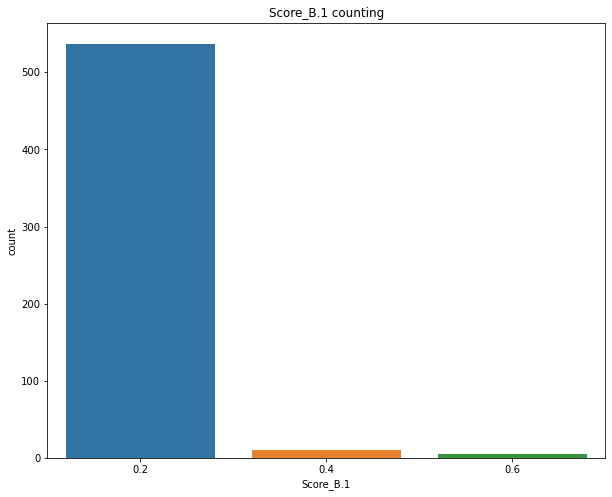

In [174]:
sns.countplot(x='Score_B.1',data=df)
plt.xlabel=("Score-B.1")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Score_B.1 counting")

#### Score with 0.3 are more in counts.Let us see the distribution with pi plot

### PIE CHART

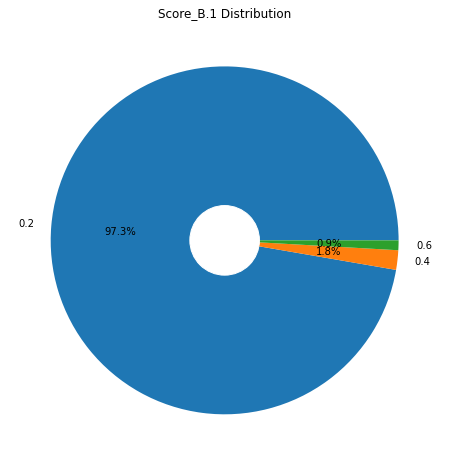

In [175]:
Frequency_by_score=df["Score_B.1"].value_counts()
keys=Frequency_by_score.keys().to_list()
counts=Frequency_by_score.to_list()

plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.2,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Score_B.1 Distribution")
plt.show()
        

#### 97.3% of the data belongs of score B is for 0.2 .Let us see the influence of Score A with Target variable

#### COUNT PLOT WITH RISK AS HUE

Text(0.5, 1.0, 'Score_B.1 with Risk')

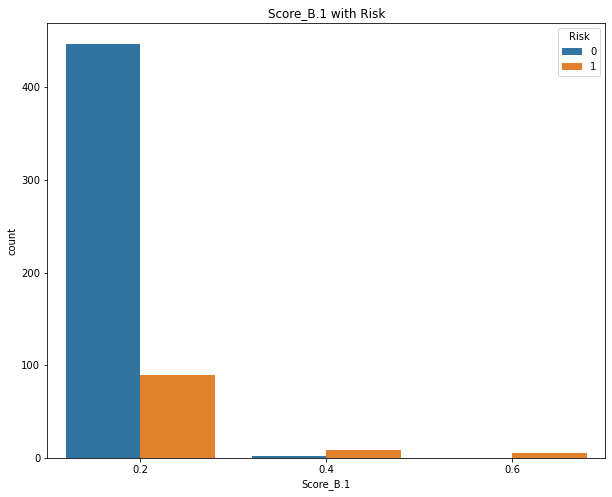

In [176]:
sns.countplot(x='Score_B.1',hue="Risk",data=df)
plt.xlabel=("Score_B.1")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [10,8]
plt.title("Score_B.1 with Risk")

#### With Score as 0.2 the there is less possibility of facing Risk. With 0.6 as score there is high possibility of facing risk. 

In [177]:
df.groupby("Risk")['Score_B.1'].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,449.0,0.200891,0.013333,0.2,0.2,0.2,0.2,0.4
1,103.0,0.234951,0.098726,0.2,0.2,0.2,0.2,0.6


### 12.Risk_C

In [179]:
df.Risk_C.describe()

count    552.000000
mean       1.046377
std        0.302178
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.900000
Name: Risk_C, dtype: float64

### HISTOGRAM

<function matplotlib.pyplot.show(close=None, block=None)>

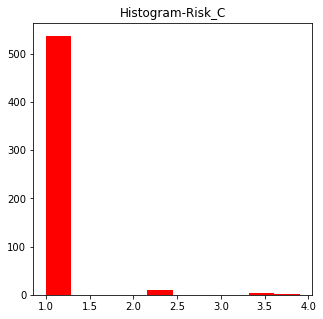

In [181]:
##Histogram
plt.hist(df.Risk_C,color='red')
plt.xlabel=('Risk_C')
plt.ylabel=('Frequency')
plt.rcParams['figure.figsize'] = [10,8]
plt.title('Histogram-Risk_C')
plt.show

In [182]:
df.Risk_C.value_counts()

1.0    537
2.2     10
3.6      3
3.9      2
Name: Risk_C, dtype: int64

### COUNT PLOT

Text(0.5, 1.0, 'Risk_C counting')

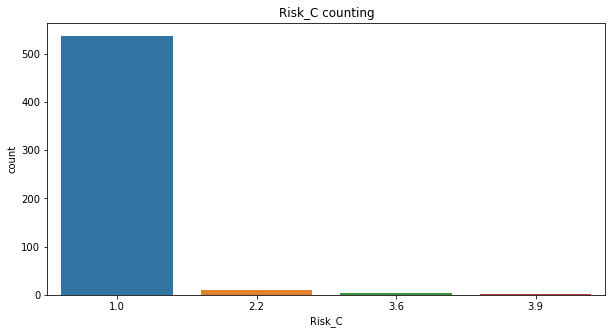

In [188]:
sns.countplot(x='Risk_C',data=df)
plt.xlabel=("Risk-C")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [5,5]
plt.title("Risk_C counting")

#### Risk C with 1.0 are more in counts remaining three are very less in count.Lets see the distribution using pie plot

### PIE CHART

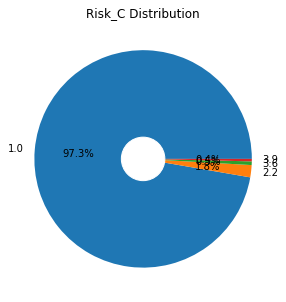

In [189]:
Frequency_by_Risk=df["Risk_C"].value_counts()
keys=Frequency_by_Risk.keys().to_list()
counts=Frequency_by_Risk.to_list()

plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.2,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Risk_C Distribution")
plt.show()
        

#### 97.3% of the data belongs of Rick_C belongs to 1.0 .Let us see the influence of Risk C with Target variable

#### COUNTPLOT WITH RISK AS HUE

Text(0.5, 1.0, 'Risk_C with Risk')

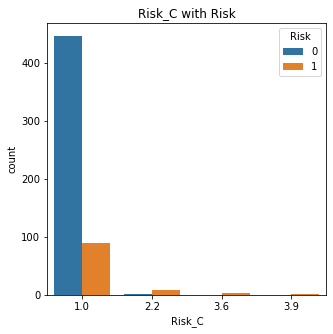

In [190]:
sns.countplot(x='Risk_C',hue="Risk",data=df)
plt.xlabel=("Risk_C")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [10,8]
plt.title("Risk_C with Risk")

#### Lesser the Risk_C score  lesser the probability of facing overall Risk

In [191]:
df.groupby('Risk')['Risk_C'].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,449.0,1.005345,0.080000,1.0,1.0,1.0,1.0,2.2
1,103.0,1.225243,0.652254,1.0,1.0,1.0,1.0,3.9


### 13.Money_Value

### HISTOGRAM

<function matplotlib.pyplot.show(close=None, block=None)>

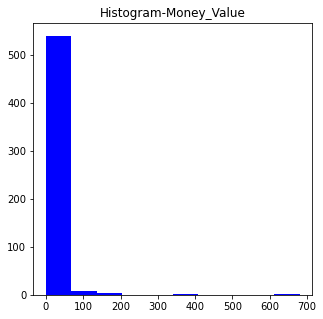

In [193]:
#Histogram
plt.hist(df.Money_Value,color='blue')
plt.xlabel=('Money_Value')
plt.ylabel=('Frequency')
plt.rcParams['figure.figsize'] = [10,8]
plt.title('Histogram-Money_Value')
plt.show

#### BOXPLOT

<AxesSubplot:>

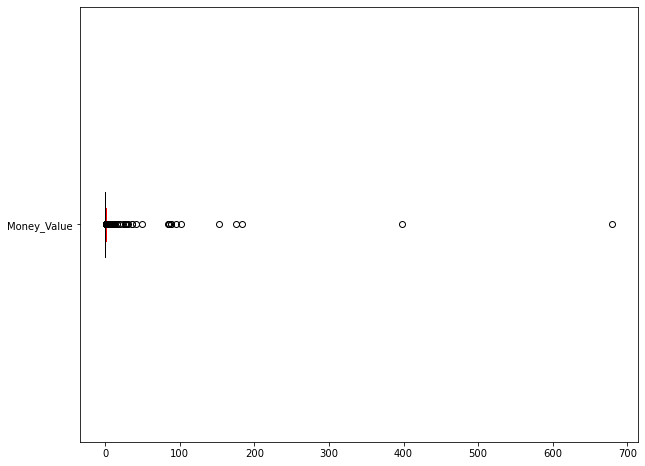

In [194]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df.Money_Value.plot.box(color=props2, patch_artist = True, vert = False)

In [196]:
IQR=df.Money_Value.quantile(0.75)-df.Money_Value.quantile(0.25)
LL=df.Money_Value.quantile(0.25)-(1.5*IQR)
UL=df.Money_Value.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  0.3225
LL:  -0.48375
UL:  0.80625


In [197]:
UL_LEN=len(df.Money_Value[df.Money_Value>UL])
print('UPPER LIMILT LENGHT :',UL_LEN)

UPPER LIMILT LENGHT : 94


In [198]:
UL_PERC=UL_LEN/len(df)
print('UPPER LIMILT  OUTLIERS PERCENTAGE  :',UL_PERC)

UPPER LIMILT  OUTLIERS PERCENTAGE  : 0.17028985507246377


In [199]:
df.groupby("Risk")['Money_Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,449.0,0.337292,1.010825,0.0,0.0,0.00,0.110,8.21
1,103.0,27.039126,83.088442,0.0,0.0,0.43,15.955,680.14


### 14.Score_MV

In [200]:
df.Score_MV.value_counts()

0.2    506
0.6     34
0.4     12
Name: Score_MV, dtype: int64

Text(0.5, 1.0, 'Score_MV counting')

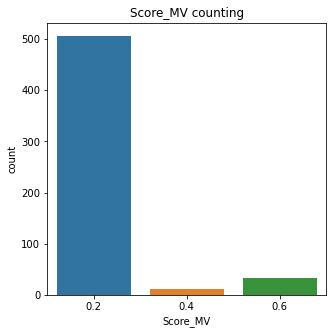

In [202]:
sns.countplot(x='Score_MV',data=df)
plt.xlabel=("Score_MV")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [10,4]
plt.title("Score_MV counting")

#### Score_MV with 0.2 are more in counts remaining two are very less in count.Lets see the distribution using pie plot

### PIE CHART

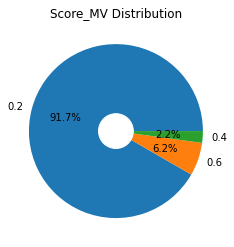

In [203]:
Frequency_by_Score_MV=df["Score_MV"].value_counts()
keys=Frequency_by_Score_MV.keys().to_list()
counts=Frequency_by_Score_MV.to_list()

plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.2,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Score_MV Distribution")
plt.show()
        

#### 91.7% of the data belongs of Score_MV belongs to 0.2 .Let us see the influence of Score_MV with Target variable

### COUNTPLOT WITH RISK AS HUE

Text(0.5, 1.0, 'Score_MV with Risk')

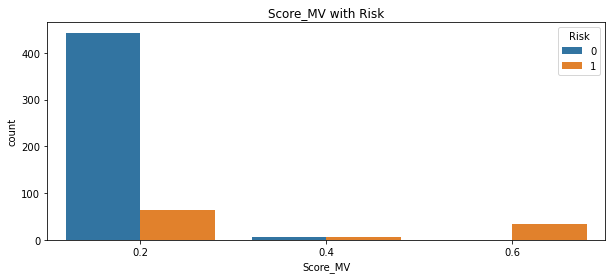

In [205]:
sns.countplot(x='Score_MV',hue="Risk",data=df)
plt.xlabel=("Score_MV")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [10,8]
plt.title("Score_MV with Risk")

In [207]:
df.groupby('Risk')['Score_MV'].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,449.0,0.202673,0.022990,0.2,0.2,0.2,0.2,0.4
1,103.0,0.343689,0.186647,0.2,0.2,0.2,0.6,0.6


### 15.Risk_D

In [208]:
df.Risk_D.value_counts()

0.000     318
0.008      11
0.004       9
0.012       7
0.010       6
         ... 
16.260      1
0.248       1
0.256       1
6.318       1
0.042       1
Name: Risk_D, Length: 149, dtype: int64

#### HISTOGRAM

<function matplotlib.pyplot.show(close=None, block=None)>

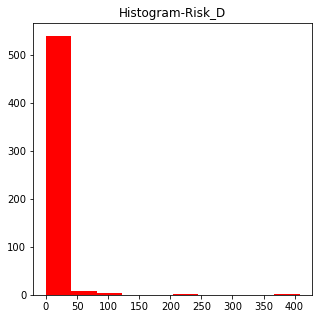

In [211]:
##Histogram
plt.hist(df.Risk_D,color='red')
plt.xlabel=('Risk_D')
plt.ylabel=('Frequency')
plt.rcParams['figure.figsize'] = [10,5]
plt.title('Histogram-Risk_D')
plt.show

#### BOX PLOT

<AxesSubplot:>

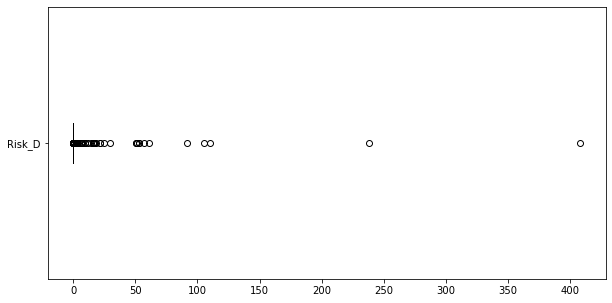

In [212]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df.Risk_D.plot.box(color=props2, patch_artist = True, vert = False)

In [213]:
IQR=df.Risk_D.quantile(0.75)-df.Risk_D.quantile(0.25)
LL=df.Risk_D.quantile(0.25)-(1.5*IQR)
UL=df.Risk_D.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  0.0645
LL:  -0.09675
UL:  0.16125


In [214]:
UL_LEN=len(df.Risk_D[df.Risk_D>UL])
print('UPPER LIMILT LENGHT :',UL_LEN)

UPPER LIMILT LENGHT : 94


In [215]:
UL_PERC=UL_LEN/len(df)
print('UPPER LIMILT  OUTLIERS PERCENTAGE  :',UL_PERC)

UPPER LIMILT  OUTLIERS PERCENTAGE  : 0.17028985507246377


In [217]:
df.groupby("Risk")["Risk_D"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,434.0,0.036334,0.088001,0.0,0.0,0.000,0.014,0.494
1,61.0,0.034066,0.060748,0.0,0.0,0.004,0.038,0.244


### 16.District_Loss

In [218]:
df.District_Loss.value_counts()

2    423
6     40
4     32
Name: District_Loss, dtype: int64

### COUNTPLOT

Text(0.5, 1.0, 'District_Loss counting')

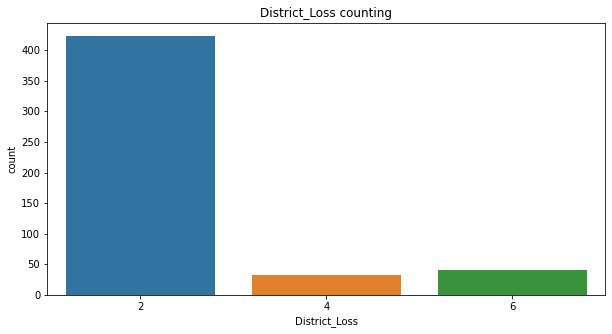

In [219]:
sns.countplot(x='District_Loss',data=df)
plt.xlabel=("District_Loss")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [10,4]
plt.title("District_Loss counting")

#### District loss with 2 type of category are more in number, 4 and 6 type of category are almost same in number. Lets analyze their distribution using pie plot

#### PIE CHART

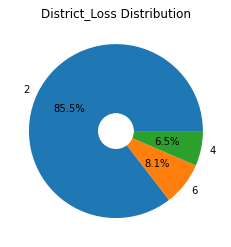

In [220]:
Frequency_by_District_Loss=df["District_Loss"].value_counts()
keys=Frequency_by_District_Loss.keys().to_list()
counts=Frequency_by_District_Loss.to_list()

plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.2,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("District_Loss Distribution")
plt.show()
        

##### 85.5% of the data belongs to 2 type of category lets check the influence with target variable

#### COUNTPLOT WITH RISK AS HUE

Text(0.5, 1.0, 'District_Loss with Risk')

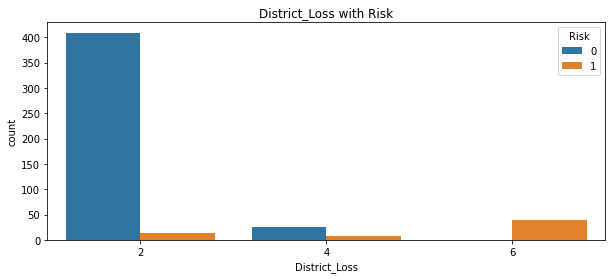

In [221]:
sns.countplot(x='District_Loss',hue="Risk",data=df)
plt.xlabel=("District_Loss")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [10,8]
plt.title("District_Loss with Risk")

#### lesser the District Loss category less is the Risk probability

### 17.PROB

In [222]:
df.PROB.value_counts()

0.2    488
0.4      7
Name: PROB, dtype: int64

#### COUNT PLOT

Text(0.5, 1.0, 'PROB counting')

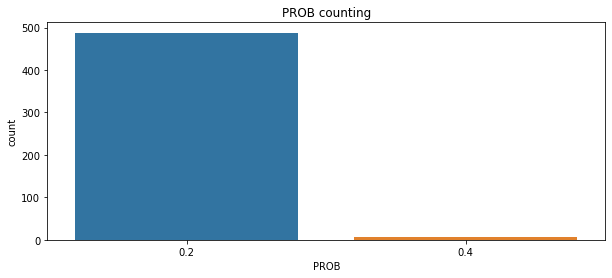

In [224]:
sns.countplot(x='PROB',data=df)
plt.xlabel=("PROB")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [10,8]
plt.title("PROB counting")

#### Probability with 0.2 are more in counts compared to 0.4.Lets analyze its distribution with pie plot

### PIE CHART

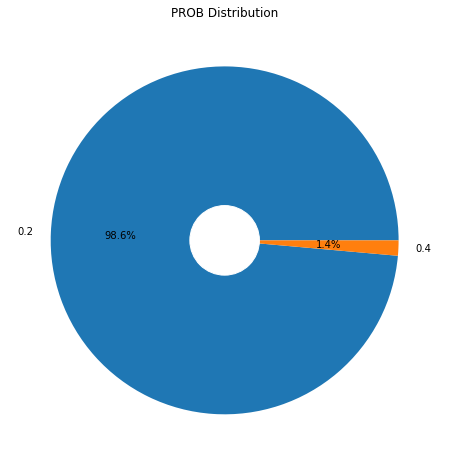

In [225]:
Frequency_by_PROB=df["PROB"].value_counts()
keys=Frequency_by_PROB.keys().to_list()
counts=Frequency_by_PROB.to_list()

plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.2,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("PROB Distribution")
plt.show()
        

#### 0.2 probability contains 98.6% of the data.Lets check the target variable influence on it

#### COUNT PLOT WITH RISK AS HUE

Text(0.5, 1.0, 'PROB with Risk')

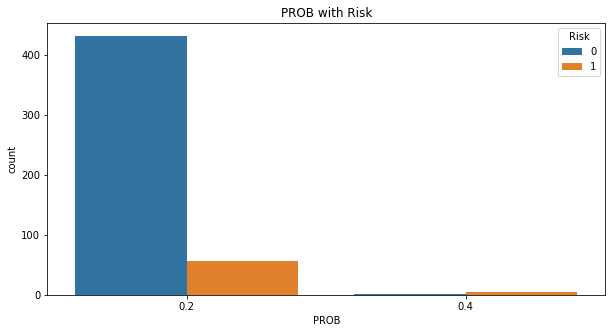

In [228]:
sns.countplot(x='PROB',hue="Risk",data=df)
plt.xlabel=("PROB")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [5,5]
plt.title("PROB with Risk")

In [229]:
df.groupby('Risk')['PROB'].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,434.0,0.200922,0.013561,0.2,0.2,0.2,0.2,0.4
1,61.0,0.216393,0.055318,0.2,0.2,0.2,0.2,0.4


### 18.RiSk_E

In [230]:
df.RiSk_E.value_counts()

0.4    420
1.2     37
0.8     34
2.4      3
1.6      1
Name: RiSk_E, dtype: int64

#### COUNTPLOT

Text(0.5, 1.0, 'RiSk_E counting')

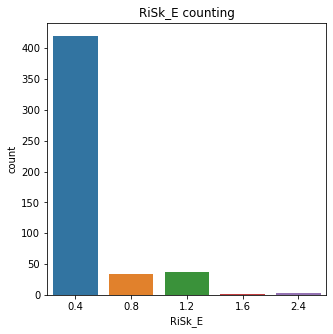

In [231]:
sns.countplot(x='RiSk_E',data=df)
plt.xlabel=("RiSk_E")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [10,8]
plt.title("RiSk_E counting")

#### PIE CHART

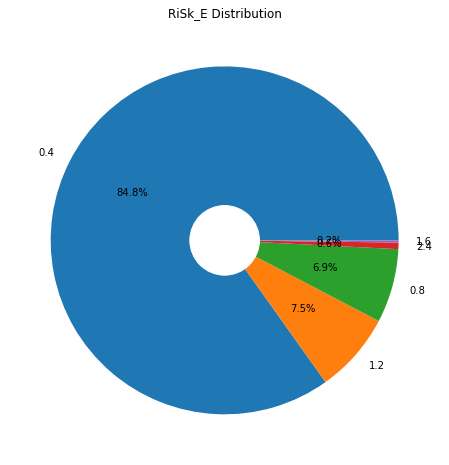

In [232]:
Frequency_by_RiSk_E=df["RiSk_E"].value_counts()
keys=Frequency_by_RiSk_E.keys().to_list()
counts=Frequency_by_RiSk_E.to_list()

plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.2,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("RiSk_E Distribution")
plt.show()
        

#### COUNT PLOT WITH RISK AS HUE

Text(0.5, 1.0, 'RiSk_E with Risk')

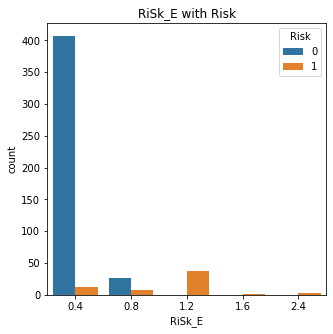

In [234]:
sns.countplot(x='RiSk_E',hue="Risk",data=df)
plt.xlabel=("RiSk_E")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [10,8]
plt.title("RiSk_E with Risk")

#### COUNTPLOT WITH PROB

Text(0.5, 1.0, 'RiSk_E with PROB')

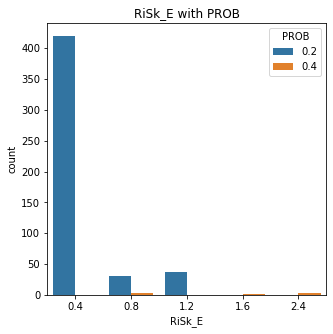

In [244]:
sns.countplot(x='RiSk_E',hue="PROB",data=df)
plt.xlabel=("RiSk_E")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [10,8]
plt.title("RiSk_E with PROB")

#### 0.4 Risk_E factor has 0.2 probability and 0.4 probability is negligible. With 1.2 facotr 0.2 probability is more than 0.8 factor's 0.2 probability

In [235]:
df.groupby('Risk')["RiSk_E"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,434.0,0.424885,0.096728,0.4,0.4,0.4,0.4,0.8
1,61.0,1.049180,0.457028,0.4,0.8,1.2,1.2,2.4


### 19.History

In [260]:
df.History.value_counts()

0    494
1      1
Name: History, dtype: int64

#### COUNT PLOT WITH RISK AS HUE

Text(0.5, 1.0, 'History with Risk')

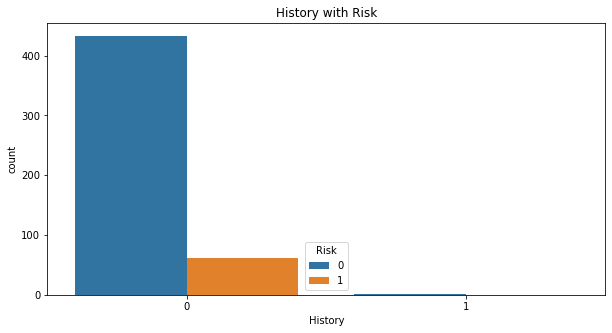

In [263]:
sns.countplot(x='History',hue="Risk",data=df)
plt.xlabel=("History")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [5,5]
plt.title("History with Risk")

### 20.Prob

In [236]:
df.Prob.value_counts()

0.2    494
0.4      1
Name: Prob, dtype: int64

#### COUNTPLOT

Text(0.5, 1.0, 'Prob counting')

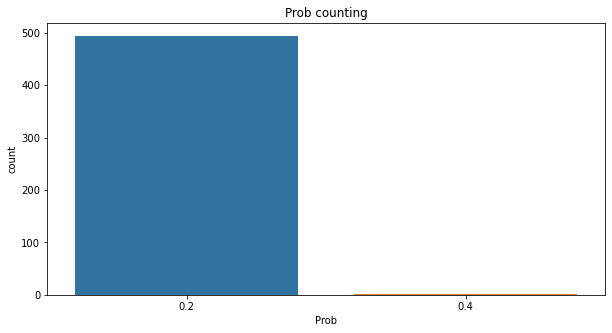

In [239]:
sns.countplot(x='Prob',data=df)
plt.xlabel=("Prob")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [5,5]
plt.title("Prob counting")

#### COUNTPLOT WITH RISK AS HUE

Text(0.5, 1.0, 'Prob with Risk')

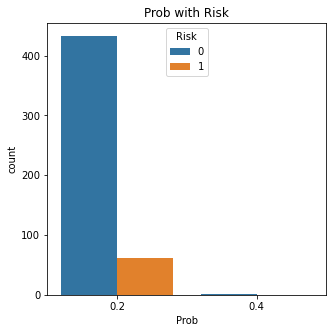

In [240]:
sns.countplot(x='Prob',hue="Risk",data=df)
plt.xlabel=("Prob")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [5,5]
plt.title("Prob with Risk")

In [242]:
df.groupby('Risk')['Prob'].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,434.0,0.200461,9.600307e-03,0.2,0.2,0.2,0.2,0.4
1,61.0,0.200000,1.959014e-16,0.2,0.2,0.2,0.2,0.2


### 21.Risk_F

In [243]:
df.Risk_F.value_counts()

0.0    494
0.4      1
Name: Risk_F, dtype: int64

#### COUNTPLOT

Text(0.5, 1.0, 'Risk_F counting')

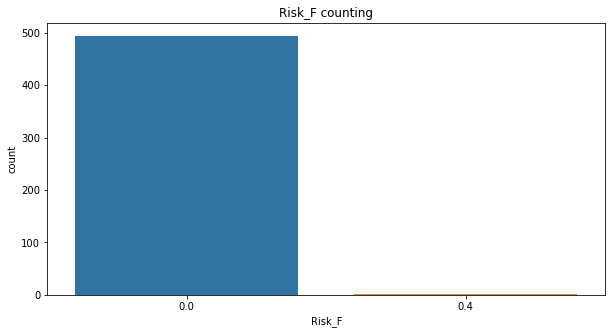

In [248]:
sns.countplot(x='Risk_F',data=df)
plt.xlabel=("Risk_F")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [5,5]
plt.title("Risk_F counting")

#### COUNTPLOT WITH RISK AS HUE

Text(0.5, 1.0, 'Risk_F with Risk')

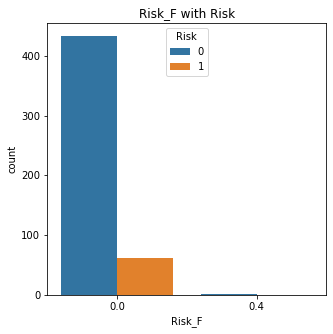

In [249]:
sns.countplot(x='Risk_F',hue="Risk",data=df)
plt.xlabel=("Risk_F")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [10,8]
plt.title("Risk_F with Risk")

#### COUNTPLOT WITH PROB

Text(0.5, 1.0, 'Risk_F with Prob')

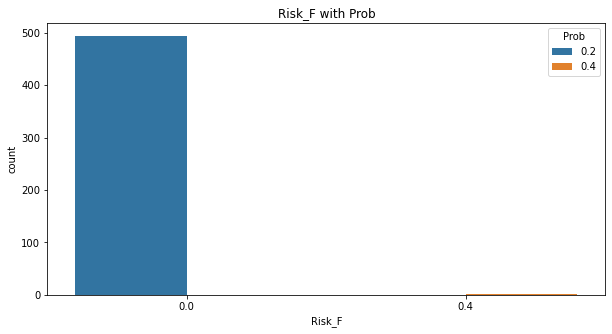

In [253]:
sns.countplot(x='Risk_F',hue="Prob",data=df)
plt.xlabel=("Risk_F")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [5,5]
plt.title("Risk_F with Prob")

In [254]:
df.groupby('Risk_F')["Prob"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk_F,,,,,,,,
0.0,494.0,0.2,1.750374e-15,0.2,0.2,0.2,0.2,0.2
0.4,1.0,0.4,NaN,0.4,0.4,0.4,0.4,0.4


### 22.Score

In [255]:
df.Score.value_counts()

2.0    279
2.2     91
2.4     65
2.6     34
2.8     11
3.0     11
3.4      2
3.2      2
Name: Score, dtype: int64

#### COUNTPLOT

Text(0.5, 1.0, 'Score counting')

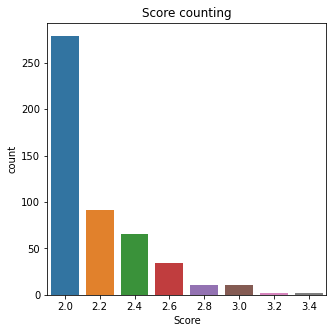

In [256]:
sns.countplot(x='Score',data=df)
plt.xlabel=("Score")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [5,5]
plt.title("Score counting")

#### PIE CHART

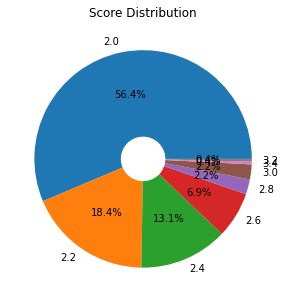

In [257]:
Frequency_by_Score=df["Score"].value_counts()
keys=Frequency_by_Score.keys().to_list()
counts=Frequency_by_Score.to_list()

plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.2,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Score Distribution")
plt.show()
        

#### COUNTPLOT WITH RISK AS HUE

Text(0.5, 1.0, 'Score with Risk')

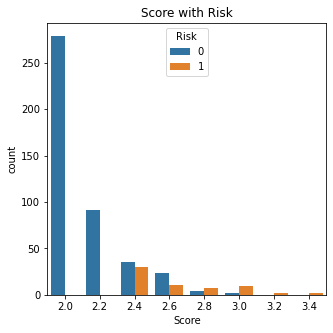

In [258]:
sns.countplot(x='Score',hue="Risk",data=df)
plt.xlabel=("Score")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [10,8]
plt.title("Score with Risk")

#### Lesser the score lesser the chance of facing the risk

In [259]:
df.groupby("Risk")["Score"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,434.0,2.117972,0.192467,2.0,2.0,2.0,2.2,3.0
1,61.0,2.629508,0.284807,2.4,2.4,2.6,2.8,3.4


### 23.Inherent_Risk

In [264]:
df.Inherent_Risk.value_counts()

1.400    52
1.578     5
2.200     5
1.800     4
1.418     4
         ..
2.092     1
2.536     1
2.322     1
2.082     1
1.750     1
Name: Inherent_Risk, Length: 312, dtype: int64

#### HISTOGRAM

<function matplotlib.pyplot.show(close=None, block=None)>

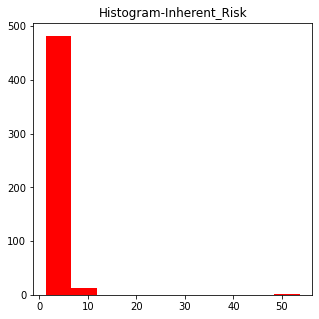

In [265]:
##Histogram
plt.hist(df.Inherent_Risk,color='red')
plt.xlabel=('Inherent_Risk')
plt.ylabel=('Frequency')
plt.rcParams['figure.figsize'] = [10,5]
plt.title('Histogram-Inherent_Risk')
plt.show

#### BOX PLOT

<AxesSubplot:>

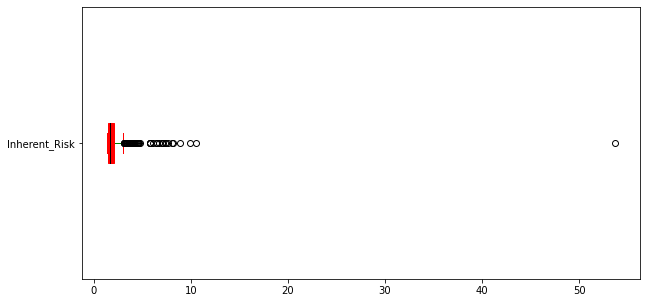

In [266]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df.Inherent_Risk.plot.box(color=props2, patch_artist = True, vert = False)

In [267]:
IQR=df.Inherent_Risk.quantile(0.75)-df.Inherent_Risk.quantile(0.25)
LL=df.Inherent_Risk.quantile(0.25)-(1.5*IQR)
UL=df.Inherent_Risk.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  0.6340000000000003
LL:  0.5359999999999996
UL:  3.072000000000001


In [268]:
UL_LEN=len(df.Inherent_Risk[df.Inherent_Risk>UL])
print('UPPER LIMILT LENGHT :',UL_LEN)

UPPER LIMILT LENGHT : 52


In [269]:
UL_PERC=UL_LEN/len(df)
print('UPPER LIMILT  OUTLIERS PERCENTAGE  :',UL_PERC)

UPPER LIMILT  OUTLIERS PERCENTAGE  : 0.10505050505050505


#### SCATTER PLOT

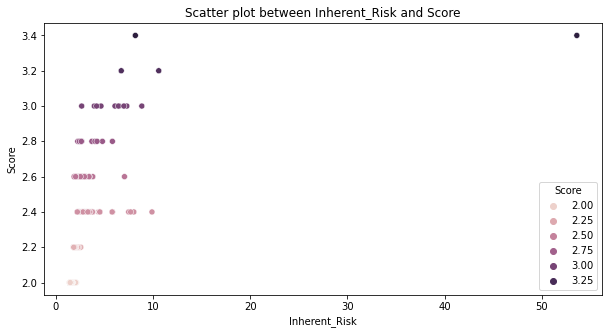

In [272]:
sns.scatterplot(x='Inherent_Risk',y='Score',hue='Score',data=df)
plt.title('Scatter plot between Inherent_Risk and Score')
plt.show()

In [270]:
df.groupby("Risk")['Inherent_Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,434.0,1.825417,0.572993,1.4,1.464,1.615,1.9645,4.636
1,61.0,5.004690,6.727043,2.2,2.420,2.930,6.0740,53.624


##### Higher the Inheritent more the prossibility of Risk

### 24.CONTROL_RISK

In [271]:
df.CONTROL_RISK.value_counts()

0.4    419
1.2     37
0.8     35
2.4      3
1.6      1
Name: CONTROL_RISK, dtype: int64

#### COUNT PLOT

Text(0.5, 1.0, 'CONTROL_RISK counting')

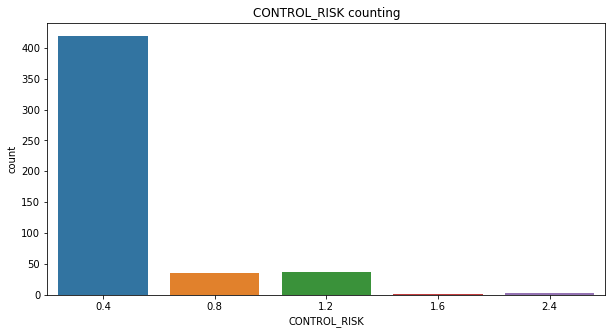

In [273]:
sns.countplot(x='CONTROL_RISK',data=df)
plt.xlabel=("CONTROL_RISK")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [5,5]
plt.title("CONTROL_RISK counting")

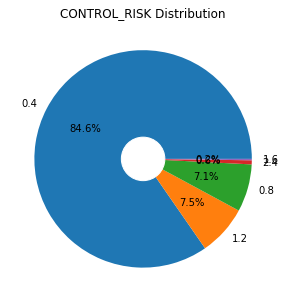

In [274]:
Frequency_by_CONTROL_RISK=df["CONTROL_RISK"].value_counts()
keys=Frequency_by_CONTROL_RISK.keys().to_list()
counts=Frequency_by_CONTROL_RISK.to_list()

plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.2,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("CONTROL_RISK Distribution")
plt.show()
        

#### COUNT PLOT WITH RISK AS HUE

Text(0.5, 1.0, 'CONTROL_RISK with Risk')

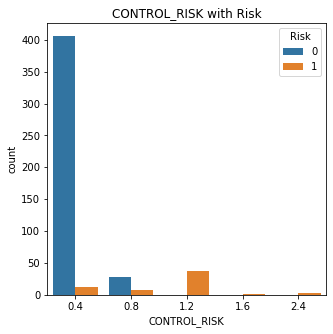

In [275]:
sns.countplot(x='CONTROL_RISK',hue="Risk",data=df)
plt.xlabel=("CONTROL_RISK")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [10,8]
plt.title("CONTROL_RISK with Risk")

In [276]:
df.groupby('Risk')['CONTROL_RISK'].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,434.0,0.425806,0.098381,0.4,0.4,0.4,0.4,0.8
1,61.0,1.049180,0.457028,0.4,0.8,1.2,1.2,2.4


### 25.Detection_Risk

In [278]:
df.Detection_Risk.value_counts()

0.5    495
Name: Detection_Risk, dtype: int64

In [279]:
df.groupby('Risk')['Detection_Risk'].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,434.0,0.5,0.0,0.5,0.5,0.5,0.5,0.5
1,61.0,0.5,0.0,0.5,0.5,0.5,0.5,0.5


### 26.Audit_Risk

In [283]:
df.Audit_Risk.value_counts()

0.2800    52
1.3200     5
0.3156     5
0.2828     4
0.3136     4
          ..
0.7536     1
0.7432     1
4.1232     1
0.4456     1
0.3144     1
Name: Audit_Risk, Length: 326, dtype: int64

#### HISTOGRAM

<function matplotlib.pyplot.show(close=None, block=None)>

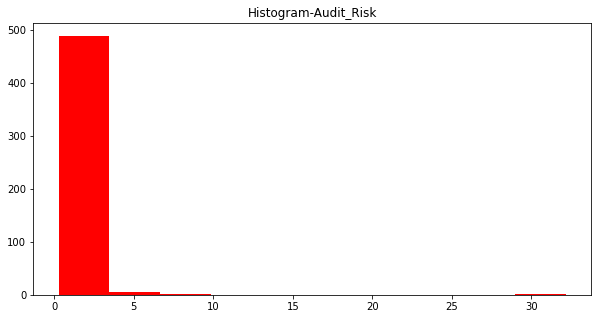

In [285]:
##Histogram
plt.hist(df.Audit_Risk,color='red')
plt.xlabel=('Audit_Risk')
plt.ylabel=('Frequency')
plt.rcParams['figure.figsize'] = [10,8]
plt.title('Histogram-Audit_Risk')
plt.show

#### BOX PLOT

<AxesSubplot:>

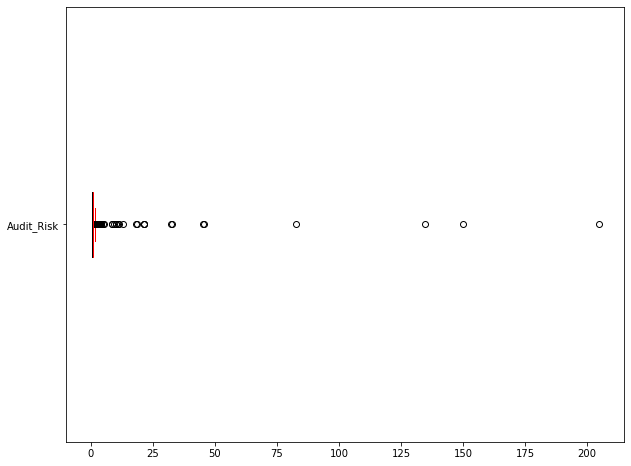

In [312]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df.Audit_Risk.plot.box(color=props2, patch_artist = True, vert = False)

In [313]:
IQR=df.Audit_Risk.quantile(0.75)-df.Inherent_Risk.quantile(0.25)
LL=df.Audit_Risk.quantile(0.25)-(1.5*IQR)
UL=df.Audit_Risk.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  -0.7545000000000001
LL:  1.4332500000000001
UL:  -0.37875000000000003


#### AUDIT RISK HAS ALMOST ALL THE POINTS AS OUTLIERS

In [315]:
df.groupby('Risk')["Audit_Risk"].describe()

,count,mean,std,min,25%,50%,75%,max
Risk,,,,,,,,
0,449.0,0.399937,0.169037,0.2800,0.2932,0.3264,0.4104,0.9920
1,103.0,10.460152,29.306593,1.0144,1.4058,1.8552,4.0358,204.7808


#### SCATTERPLOT

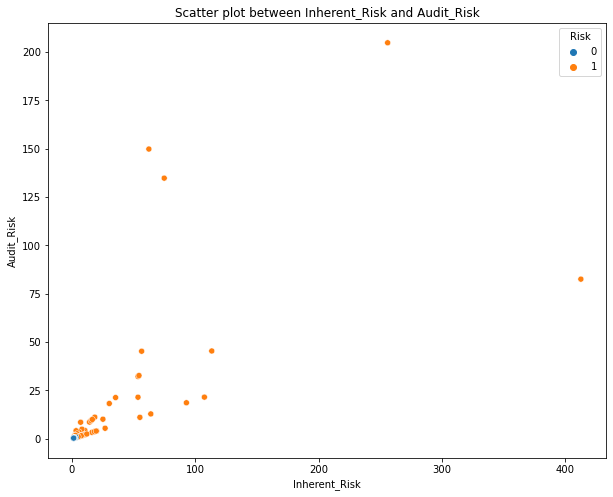

In [316]:
sns.scatterplot(x='Inherent_Risk',y='Audit_Risk',hue='Risk',data=df)
plt.title('Scatter plot between Inherent_Risk and Audit_Risk')
plt.show()

### CORRELATION MATRIX

In [317]:
cormat=df.corr()
cormat

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
Sector_score,1.000000,-0.147923,-0.372150,-0.146722,-0.166985,-0.051839,-0.120902,-0.161083,-0.077538,-0.076126,...,-0.179358,-0.074943,-0.085846,-0.068629,-0.292178,-0.099929,-0.172582,NaN,-0.089751,-0.285308
PARA_A,-0.147923,1.000000,0.455620,0.998631,0.177794,0.227380,0.203455,0.970027,0.161807,0.155643,...,0.161515,0.153972,0.165349,0.145520,0.409932,0.222494,0.189614,NaN,0.309196,0.295077
Score_A,-0.372150,0.455620,1.000000,0.459068,0.160614,0.159246,0.172232,0.446691,0.168075,0.170543,...,0.123120,0.142914,0.169766,0.128390,0.596503,0.173716,0.151673,NaN,0.193850,0.356753
Risk_A,-0.146722,0.998631,0.459068,1.000000,0.178711,0.224922,0.203185,0.968463,0.162350,0.156673,...,0.161379,0.153498,0.165763,0.144694,0.410688,0.221327,0.189167,NaN,0.308636,0.298005
PARA_B,-0.166985,0.177794,0.160614,0.178711,1.000000,0.696980,0.939438,0.295882,0.012797,0.025230,...,-0.053293,-0.014558,0.006902,-0.022998,0.370434,-0.027005,-0.052344,NaN,-0.042280,0.136102
Score_B,-0.051839,0.227380,0.159246,0.224922,0.696980,1.000000,0.889618,0.307317,0.048979,0.061531,...,0.006915,0.020901,0.050137,0.008401,0.548625,0.011401,0.009005,NaN,0.006305,0.161159
Risk_B,-0.120902,0.203455,0.172232,0.203185,0.939438,0.889618,1.000000,0.313221,0.026915,0.039586,...,-0.031429,-0.003605,0.019478,-0.012980,0.477999,-0.012005,-0.030632,NaN,-0.024189,0.160761
TOTAL,-0.161083,0.970027,0.446691,0.968463,0.295882,0.307317,0.313221,1.000000,0.090263,0.074177,...,0.129590,0.110972,0.096441,0.114200,0.394943,0.116936,0.151091,NaN,0.159788,0.285996
numbers,-0.077538,0.161807,0.168075,0.162350,0.012797,0.048979,0.026915,0.090263,1.000000,0.981087,...,0.311594,0.725325,0.697508,0.718886,0.610289,0.605861,0.544796,NaN,0.817215,0.277632
Score_B.1,-0.076126,0.155643,0.170543,0.156673,0.025230,0.061531,0.039586,0.074177,0.981087,1.000000,...,0.291428,0.595843,0.601809,0.578739,0.615088,0.657127,0.471291,NaN,0.777766,0.288100


#### HEAT MAP

<Figure size 2520x1800 with 0 Axes>

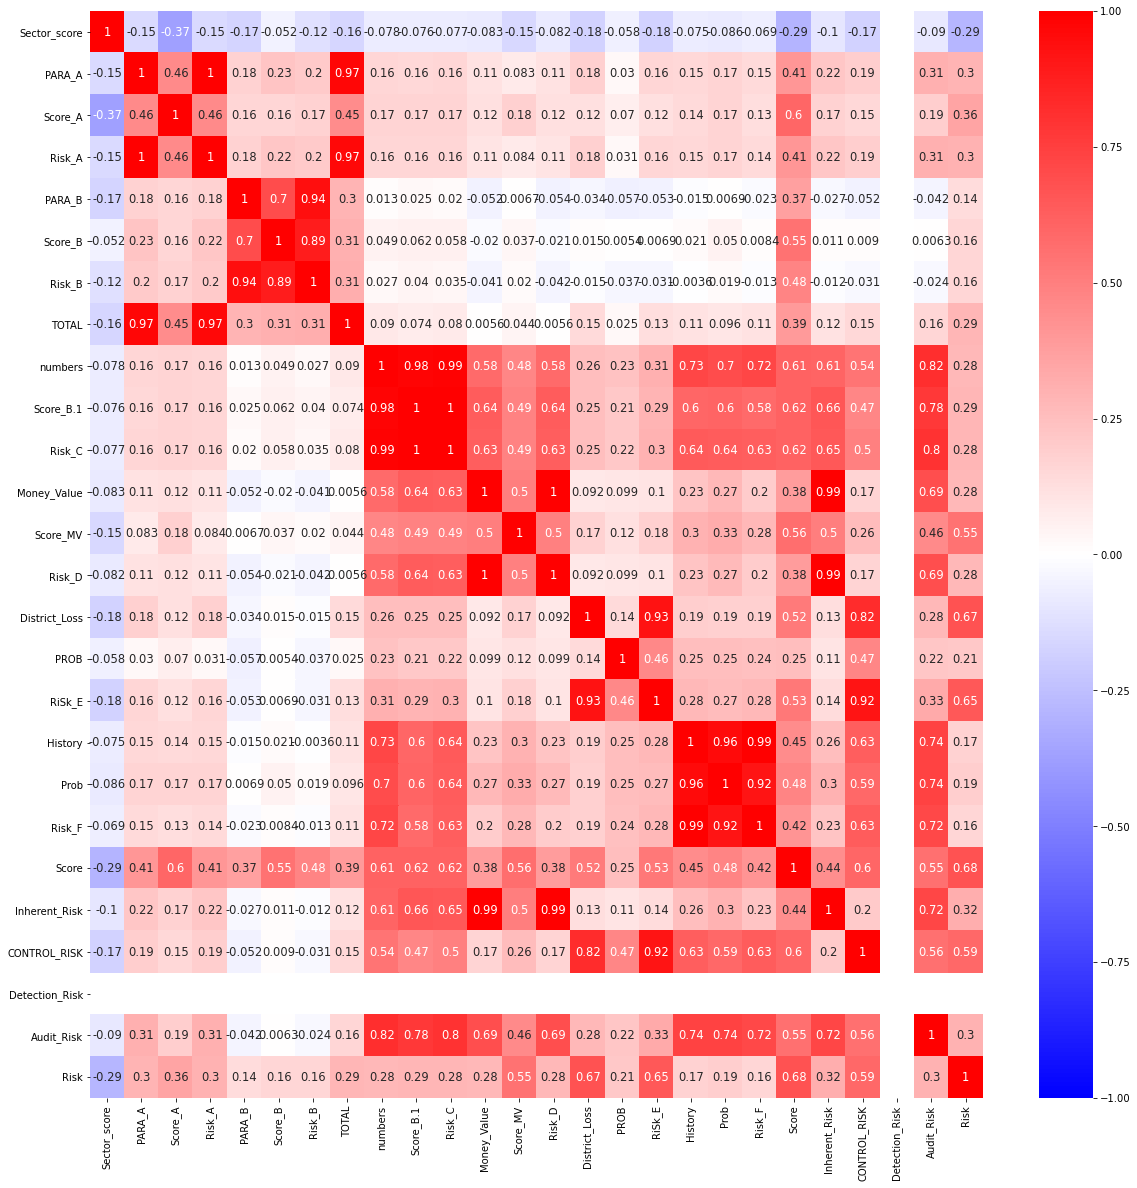

<Figure size 2520x1800 with 0 Axes>

In [322]:
sns.heatmap(cormat,annot = True, vmax = 1.0, vmin = -1.0, cmap = 'bwr', annot_kws = {"size": 11.5})
plt.figure(figsize = (35,25))

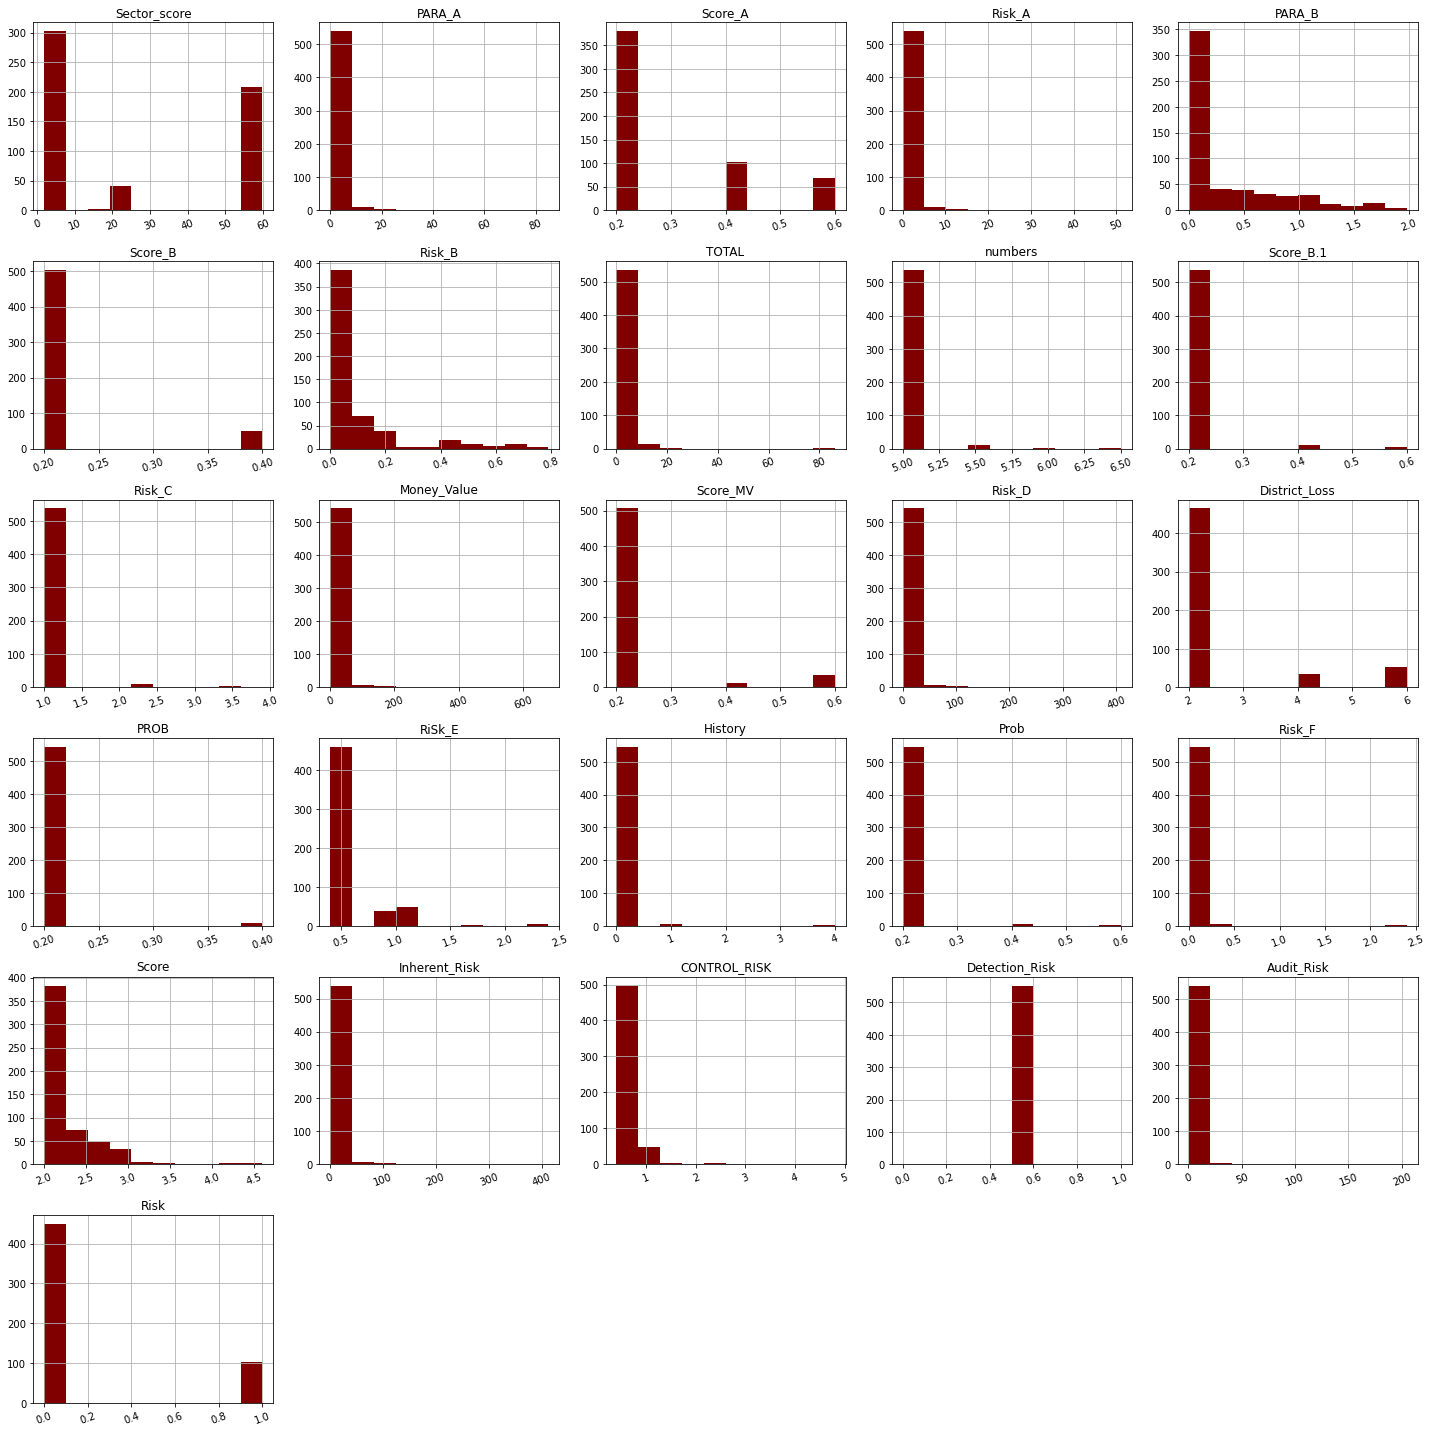

In [323]:
df.hist(xrot = 20, color = "maroon")
plt.tight_layout()
plt.show()